## What is a knn?
A knn is the simplest machine learning model and can also be Identified as an algorithm.
Instance-Based Learning: KNN does not learn a function during training. Instead, it memorizes the dataset and makes
 predictions based on neighboring data points.
Lazy Learning: No actual model is built during training; predictions are made at runtime by looking at nearby data points.
Distance-Based Classification: KNN classifies a new point based on the majority class of its nearest neighbors.
How it really works:
It chooses K, the number of neighbors to consider, Find the K closest points and dataset using a distance metric.
Then it predicts the value based off of its neighbors values.


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Using Iris dataset
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data   # Features
y = iris.target # Labels (0,1,2 for three flower species)

# Convert to DataFrame for better understanding
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y  # Add target labels
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
# PreProcessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# train the Knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
# make predictions
y_pred = knn.predict(X_test)


In [9]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 100.00%
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



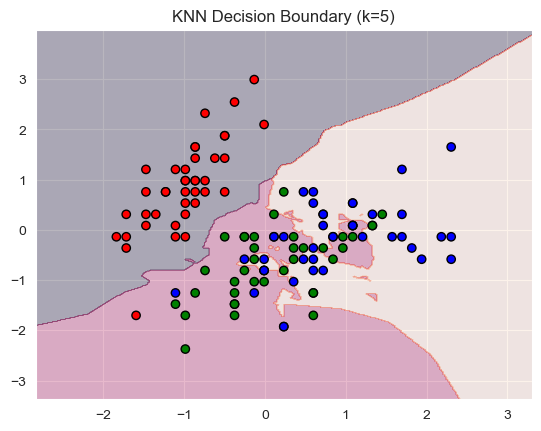

In [10]:
# Visualize the knn decision boundary
from matplotlib.colors import ListedColormap

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['red', 'green', 'blue']))
    plt.title(title)
    plt.show()

# Use only 2 features for visualization
X_vis = X_train[:, :2]
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)

plot_decision_boundary(X_vis, y_train, knn_vis, "KNN Decision Boundary (k=5)")
